
# Demo of DBSCAN clustering algorithm

Finds core samples of high density and expands clusters from them.


In [2]:

import matplotlib.pyplot as plt
# import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from hdbscan import HDBSCAN
from kneed import KneeLocator
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

## Generate sample data



In [3]:
# centers = [[1, 1], [-1, -1], [1, -1]]
centers = [[1, -1], [1, 1], [-1, -1], [-1, 1], [0,0]]
X, labels_true = make_blobs(
    n_samples=750,
    centers=centers,
    cluster_std=0.3,
    random_state=2
)

X = StandardScaler().fit_transform(X)

## K-Means



In [636]:
clusterer = KMeans(n_clusters=5, random_state=2)
cluster_labels = clusterer.fit_predict(X)

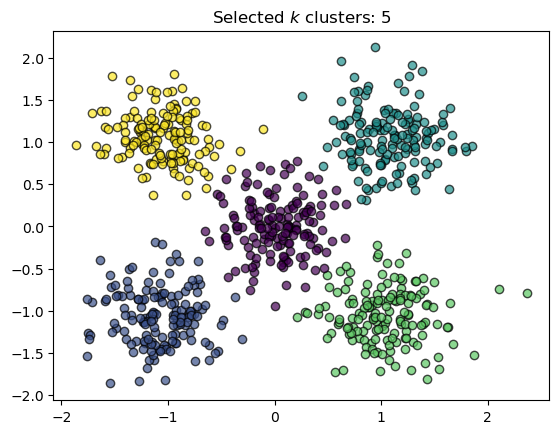

In [637]:
core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
unique_labels = set(cluster_labels)
n_clusters_ = len(unique_labels)
colors = [plt.cm.get_cmap('viridis_r')(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    # if k == -1:
    #     # Black used for noise.
    #     col = [0, 0, 0, 1]

    class_member_mask = cluster_labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
        alpha=0.5,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        alpha=0.7,
    )

plt.title(fr"Selected $k$ clusters: {n_clusters_}" )
plt.savefig('kmeans.png', dpi=300)
plt.show()

## Compute DBSCAN



In [621]:
db = DBSCAN(eps=0.252, min_samples=11).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 5
Estimated number of noise points: 33
Homogeneity: 0.885
Completeness: 0.828
V-measure: 0.856
Adjusted Rand Index: 0.886
Adjusted Mutual Information: 0.855
Silhouette Coefficient: 0.572


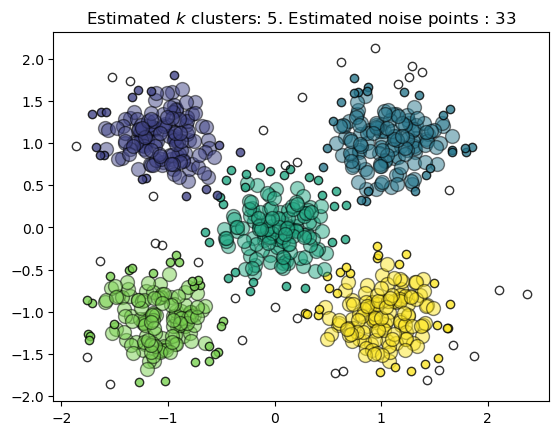

In [629]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.get_cmap('viridis_r')(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    col = tuple(col)
    if k == -1:
        # Black used for noise.
        # col = [0, 0, 0, 1]
        col = 'none'

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
        alpha=0.5,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
        alpha=0.8,
    )

plt.title(fr"Estimated $k$ clusters: {n_clusters_}. Estimated noise points : {n_noise_}" )
plt.savefig('dbscan.png', dpi=300)
plt.show()

# HDBSCAN

In [630]:
# hdb = HDBSCAN(min_cluster_size=10)
hdb = HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40,
    metric='euclidean', min_cluster_size=10, min_samples=None, p=None)
cluster_labels = hdb.fit_predict(X)
core_samples_mask = np.asarray([True if i != -1 else False for i in cluster_labels])
labels = hdb.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

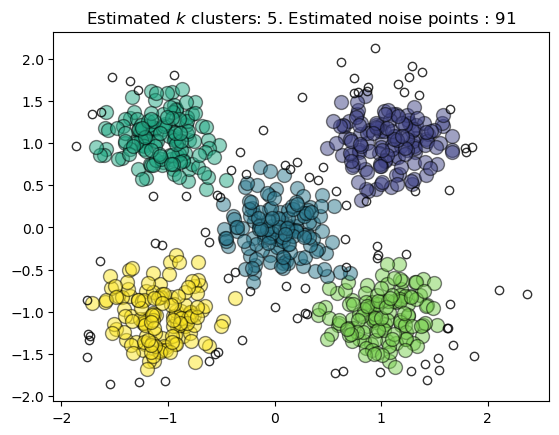

In [631]:
unique_labels = set(labels)
colors = [plt.cm.get_cmap('viridis_r')(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    col = tuple(col)
    if k == -1:
        # Black used for noise.
        # col = [0, 0, 0, 1]
        col = 'none'

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=10,
        alpha=0.5,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
        alpha=0.8,
    )

plt.title(fr"Estimated $k$ clusters: {n_clusters_}. Estimated noise points : {n_noise_}" )
plt.savefig('hdbscan.png', dpi=300)
plt.show()

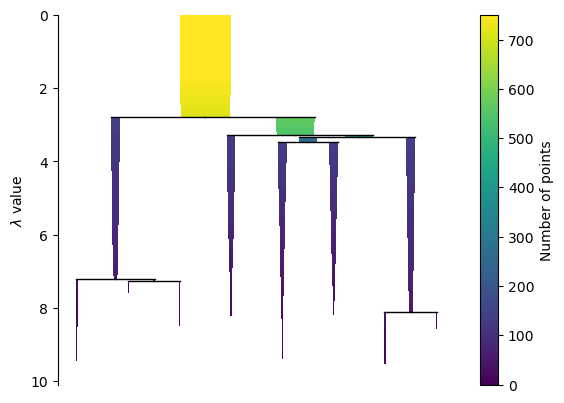

In [632]:
hdb.condensed_tree_.plot()
plt.show()

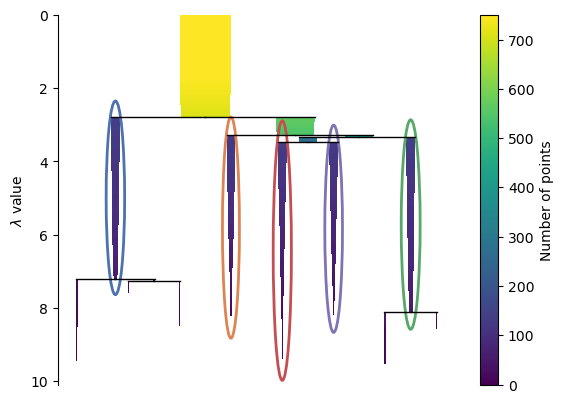

In [633]:
hdb.condensed_tree_.plot(select_clusters=True,
                         selection_palette=sns.color_palette('deep', 8))
plt.show()

In [514]:
hdb.condensed_tree_.to_networkx()

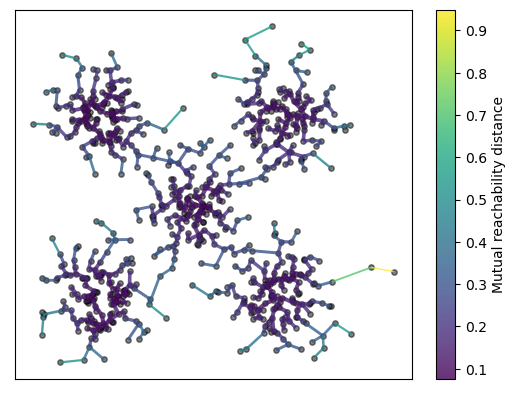

In [634]:
hdb.minimum_spanning_tree_.plot(
    edge_cmap='viridis',
    edge_alpha=0.8,
    node_size=15,
    node_alpha=0.5,
    edge_linewidth=1)
plt.show()

In [55]:
g = hdb.condensed_tree_.to_networkx()
g.number_of_nodes()

765

<AxesSubplot: ylabel='distance'>

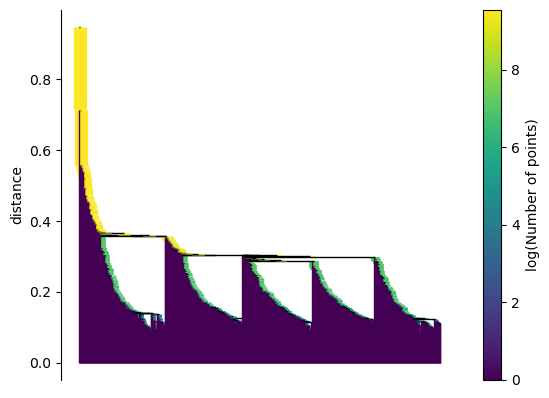

In [516]:
hdb.single_linkage_tree_.plot()

In [149]:
nearest_neighbors = NearestNeighbors(n_neighbors=12)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,distances.shape[1]-1], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
# nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
# distances, indices = nbrs.kneighbors(X)
# indices
# distances

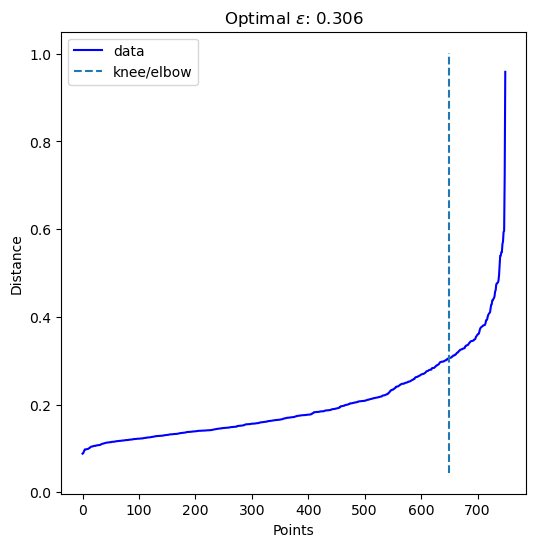

0.30624889714991327


In [615]:
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title(fr'Optimal $\epsilon$: {0.306}')
plt.savefig('db_kneepoint', dpi=300)
plt.show()

print(distances[knee.knee])

In [151]:
distances[knee.knee]

0.30624889714991327

In [202]:
sum(x for x in labels if x > 0)

0

In [181]:
def get_db(data, nn=None, min_pts=None):
    nearest_neighbors = NearestNeighbors(n_neighbors=nn)
    neighbors = nearest_neighbors.fit(data)

    distances, indices = neighbors.kneighbors(data)
    distances = np.sort(distances[:,distances.shape[1]-1], axis=0)
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    opt_eps = np.round(distances[knee.knee],3)
    
    db = DBSCAN(eps=distances[knee.knee], min_samples=min_pts).fit(data)
    labels = db.labels_
    
    results = (nn, min_pts, distances[knee.knee], metrics.silhouette_score(data, labels),metrics.calinski_harabasz_score(data, labels),metrics.davies_bouldin_score(data, labels))
    return results

In [446]:
dir(neighbors)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_radius_neighbors_reduce_func',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'radius'

In [187]:
p = X/X.sum(axis=1, keepdims=True)

In [188]:
p

array([[-1.99728096,  2.99728096],
       [ 2.26140625, -1.26140625],
       [ 0.44029566,  0.55970434],
       ...,
       [ 0.40195928,  0.59804072],
       [-1.5172237 ,  2.5172237 ],
       [ 0.78664865,  0.21335135]])

In [ ]:
from scipy.special import entr

In [182]:
db_res = []
for n_n in range(3, 20):
    for min_pts in range(5, 20):
        db_res.append(get_db(X, n_n, min_pts))
        

In [183]:
df = pd.DataFrame(db_res, columns=['nn','min_pts','eps', 'sl', 'ch', 'db'])

In [184]:
df.sort_values(by='sl', ascending=False)

,nn,min_pts,eps,sl,ch,db
163,13,18,0.316574,0.583669,909.075543,2.928362
164,13,19,0.316574,0.582513,899.482808,3.287500
146,12,16,0.306249,0.580156,891.511192,2.764111
147,12,17,0.306249,0.579286,871.060203,2.816906
148,12,18,0.306249,0.578731,867.101918,2.993843
...,...,...,...,...,...,...
10,3,15,0.138102,-0.233802,49.828711,2.724763
12,3,17,0.138102,-0.266467,25.623402,4.220376
11,3,16,0.138102,-0.291394,30.857707,3.019111
13,3,18,0.138102,-0.327602,25.372324,21.057236


In [185]:
df.sort_values(by='ch', ascending=False)

,nn,min_pts,eps,sl,ch,db
163,13,18,0.316574,0.583669,909.075543,2.928362
164,13,19,0.316574,0.582513,899.482808,3.287500
146,12,16,0.306249,0.580156,891.511192,2.764111
147,12,17,0.306249,0.579286,871.060203,2.816906
148,12,18,0.306249,0.578731,867.101918,2.993843
...,...,...,...,...,...,...
231,18,11,0.361521,0.267535,0.684602,7.709694
200,16,10,0.350071,0.267535,0.684602,7.709694
216,17,11,0.359041,0.267535,0.684602,7.709694
186,15,11,0.336536,0.229891,0.675157,8.451431


In [186]:
df.sort_values(by='db', ascending=True)

,nn,min_pts,eps,sl,ch,db
243,19,8,0.371411,0.256972,4.989940,1.484413
240,19,5,0.371411,0.256972,4.989940,1.484413
241,19,6,0.371411,0.256972,4.989940,1.484413
242,19,7,0.371411,0.256972,4.989940,1.484413
244,19,9,0.371411,0.256972,4.989940,1.484413
...,...,...,...,...,...,...
116,10,16,0.277130,0.553686,710.924562,26.229567
58,6,18,0.217985,0.425464,367.254346,35.027400
72,7,17,0.234025,0.476592,442.275077,41.344185
44,5,19,0.195563,0.281050,236.180127,57.204556


In [156]:
db = DBSCAN(eps=distances[knee.knee], min_samples=16).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(labels_true, labels)
# )
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(X, labels))

Estimated number of clusters: 5
Estimated number of noise points: 25
Silhouette Coefficient: 0.580
Calinski-Harabasz Index: 891.511
Davies-Bouldin Index: 2.764


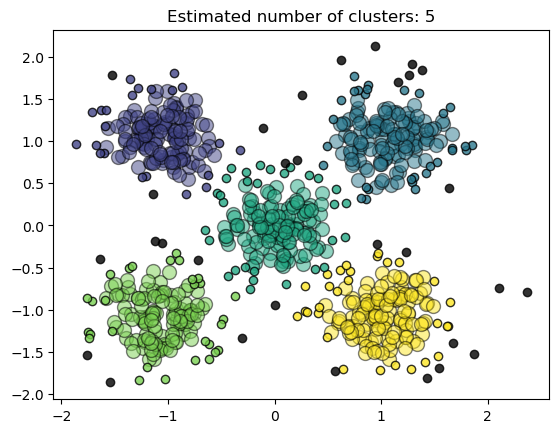

In [116]:
unique_labels = set(labels)
colors = [plt.cm.get_cmap('viridis_r')(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
        alpha=0.5,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        alpha=0.8,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
# plt.savefig('dbscan.png', dpi=300)
plt.show()

In [4]:
from matplotlib.patches import Circle 

In [5]:
# centers = [[1, -1], [1, 1], [-1, -1], [0,0]]
centers = [[0.5, -0.5],[0,0],[-0.5, -0.5]]
Y, labels_true = make_blobs(
    n_samples=25,
    centers=centers,
    cluster_std=0.5,
    random_state=111
)

Y = StandardScaler().fit_transform(Y)

In [6]:
Y

array([[ 1.34432101e+00, -2.62915349e-03],
       [ 1.12808989e+00,  8.92475557e-01],
       [-9.84684311e-01, -6.16038692e-01],
       [-2.36970140e-01,  5.35407042e-01],
       [-9.83072528e-01,  1.49416578e+00],
       [ 8.51856090e-01, -6.60816053e-01],
       [-1.76698478e+00, -1.65783389e-01],
       [ 1.09244878e+00, -8.80066589e-01],
       [-6.76358249e-01,  4.95667224e-01],
       [ 3.05911282e-01, -1.43252008e+00],
       [-1.56038831e-02,  2.60011007e-02],
       [-1.34195222e-01,  7.31488169e-01],
       [ 5.53005417e-01,  1.44996429e+00],
       [-2.12236812e+00, -1.07466387e+00],
       [-2.63206092e-01,  3.88138132e-01],
       [ 6.98538813e-02, -4.16045156e-01],
       [-1.25504224e+00,  1.04753612e+00],
       [ 9.66513654e-01, -1.52618098e+00],
       [-2.94148091e-01, -3.50863950e-01],
       [-4.32087807e-01, -4.63262806e-01],
       [ 2.63929061e-01, -7.58715582e-01],
       [-6.57397878e-01, -9.40570229e-01],
       [ 2.10761608e+00, -6.61940264e-01],
       [-1.

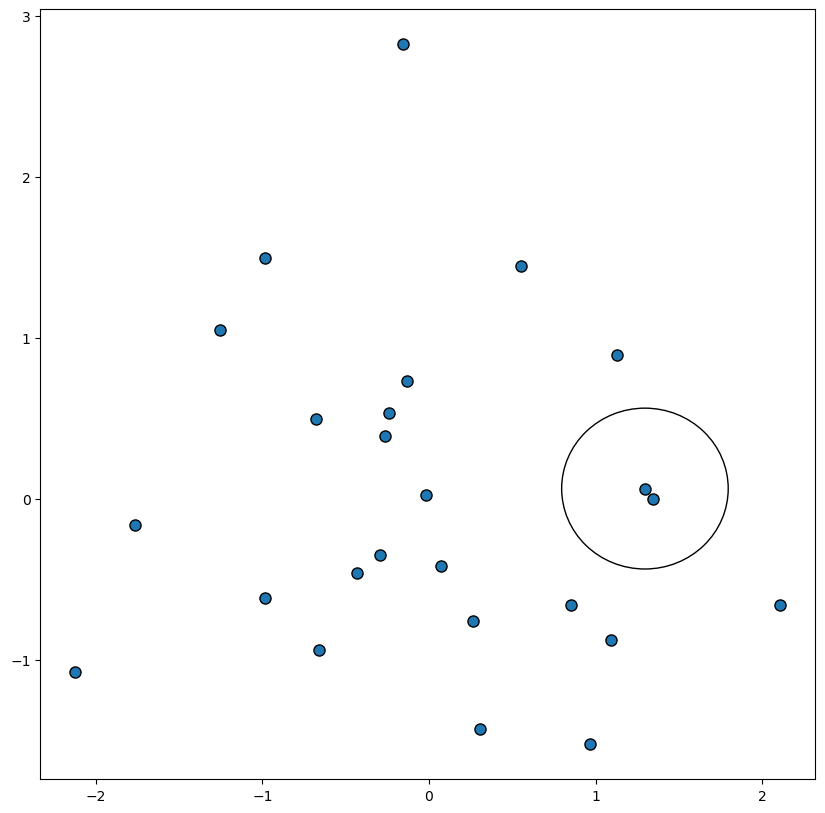

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

e = Circle(xy=Y[-1], radius=0.5, fill=False)
ax.plot(Y[:,0],
         Y[:,1],
         "o",
         # markerfacecolor=tuple(col),
         markeredgecolor="k",
         markersize=8)
ax.add_artist(e)
plt.show()

In [8]:
def get_db(data, nn=None, min_pts=None):
    nearest_neighbors = NearestNeighbors(n_neighbors=nn)
    neighbors = nearest_neighbors.fit(data)

    distances, indices = neighbors.kneighbors(data)
    distances = np.sort(distances[:,distances.shape[1]-1], axis=0)
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    opt_eps = np.round(distances[knee.knee],3)
    
    db = DBSCAN(eps=distances[knee.knee], min_samples=min_pts).fit(data)
    labels = db.labels_
    
    num_labs = sum(x for x in labels if x > 0)
    
    if num_labs > 1:
        sl = metrics.silhouette_score(data, labels)
        ch = metrics.calinski_harabasz_score(data, labels)
        ds = metrics.davies_bouldin_score(data, labels)
    else:
        sl = 0
        ch = 0
        ds = 999
    
    results = (nn, min_pts, distances[knee.knee], sl, ch, ds)
    return results

In [9]:
db_res = []
for n_n in range(3, 20):
    for min_pts in range(5, 20):
        db_res.append(get_db(Y, n_n, min_pts))
df = pd.DataFrame(db_res, columns=['nn','min_pts','eps', 'sl', 'ch', 'db'])
best = df.sort_values(by='sl', ascending=False).iloc[0,:].to_numpy()[1:3]

In [10]:
df

,nn,min_pts,eps,sl,ch,db
0,3,5,1.038337,0,0,999
1,3,6,1.038337,0,0,999
2,3,7,1.038337,0,0,999
3,3,8,1.038337,0,0,999
4,3,9,1.038337,0,0,999
...,...,...,...,...,...,...
250,19,15,2.429304,0,0,999
251,19,16,2.429304,0,0,999
252,19,17,2.429304,0,0,999
253,19,18,2.429304,0,0,999


In [11]:
# db = DBSCAN(eps=best[1], min_samples=int(best[0])).fit(Y)
db = DBSCAN(eps=0.65, min_samples=int(best[0])).fit(Y)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(Y, labels))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(Y, labels))
print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(Y, labels))

Estimated number of clusters: 1
Estimated number of noise points: 14
Silhouette Coefficient: 0.124
Calinski-Harabasz Index: 1.027
Davies-Bouldin Index: 3.877


In [12]:
cmap = plt.colormaps['tab20']

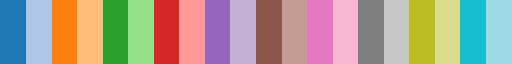

In [13]:
cmap

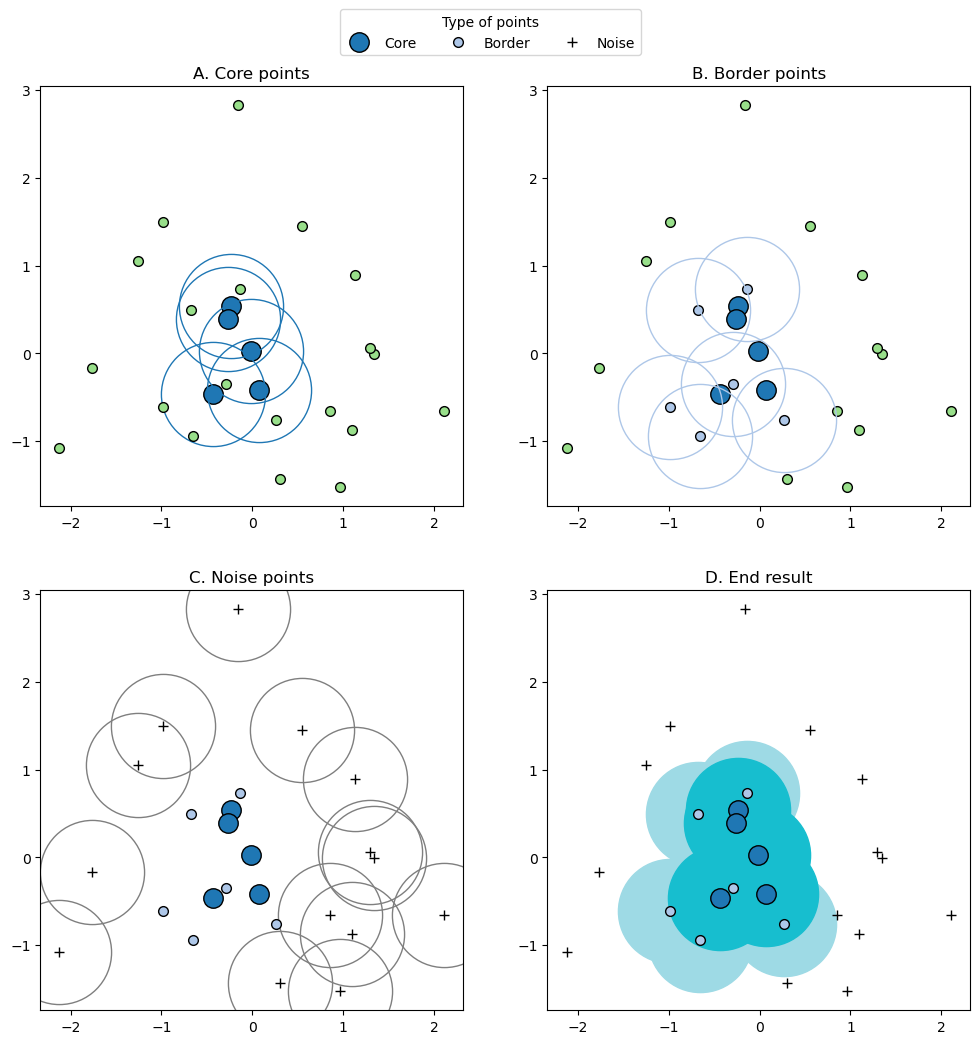

In [19]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

xy_core = Y[core_samples_mask]
noise_mask = np.asarray([True if lab == -1 else False for lab in labels])
xy_noise = Y[noise_mask]
xy_border = Y[~core_samples_mask & ~noise_mask]

eps_radius = 75
m_size = 7
m_core = 14
shape_core = 'o'
shape_border = 'o'
shape_noise = '+'

# Core
axes[0][0].plot(
    xy_core[:, 0],
    xy_core[:, 1],
    shape_core,
    markerfacecolor=cmap.colors[0], #(0.993248, 0.906157, 0.143936, 1.0)
    markeredgecolor="k",
    markersize=m_core
)

axes[0][0].plot(
    xy_core[:, 0],
    xy_core[:, 1],
    "o",
    markerfacecolor='none',
    markeredgecolor=cmap.colors[0],
    markersize=eps_radius,
)

axes[0][0].plot(
    xy_noise[:, 0],
    xy_noise[:, 1],
    "o",
    markerfacecolor=cmap.colors[5],
    markeredgecolor="k",
    markersize=m_size
)

axes[0][0].plot(
    xy_border[:, 0],
    xy_border[:, 1],
    "o",
    markerfacecolor=cmap.colors[5],
    markeredgecolor="k",
    markersize=m_size
)

# Borders

axes[0][1].plot(
    xy_core[:, 0],
    xy_core[:, 1],
    shape_core,
    markerfacecolor=cmap.colors[0],
    markeredgecolor="k",
    markersize=m_core
)

axes[0][1].plot(
    xy_noise[:, 0],
    xy_noise[:, 1],
    "o",
    markerfacecolor=cmap.colors[5],
    markeredgecolor="k",
    markersize=m_size
)

axes[0][1].plot(
    xy_border[:, 0],
    xy_border[:, 1],
    shape_border,
    markerfacecolor=cmap.colors[1],
    markeredgecolor="k",
    markersize=m_size
)

axes[0][1].plot(
    xy_border[:, 0],
    xy_border[:, 1],
    "o",
    markerfacecolor='none',
    markeredgecolor=cmap.colors[1],
    markersize=eps_radius,
)

# Noise
axes[1][0].plot(
    xy_core[:, 0],
    xy_core[:, 1],
    shape_core,
    markerfacecolor=cmap.colors[0], #(0.993248, 0.906157, 0.143936, 1.0)
    markeredgecolor="k",
    markersize=m_core
)

axes[1][0].plot(
    xy_noise[:, 0],
    xy_noise[:, 1],
    shape_noise,
    markerfacecolor=cmap.colors[-6],
    markeredgecolor="k",
    markersize=m_size
)

axes[1][0].plot(
    xy_noise[:, 0],
    xy_noise[:, 1],
    "o",
    markerfacecolor='none',
    markeredgecolor=cmap.colors[-6],
    markersize=eps_radius,
)


axes[1][0].plot(
    xy_border[:, 0],
    xy_border[:, 1],
    shape_border,
    markerfacecolor=cmap.colors[1],
    markeredgecolor="k",
    markersize=m_size
)

# All


axes[1][1].plot(
    xy_border[:, 0],
    xy_border[:, 1],
    "o",
    markerfacecolor=cmap.colors[-1], # 'none',
    markeredgecolor=cmap.colors[-1],
    markersize=eps_radius,
    # alpha=0.5
)

axes[1][1].plot(
    xy_core[:, 0],
    xy_core[:, 1],
    "o",
    markerfacecolor=cmap.colors[-2], # 'none'
    markeredgecolor=cmap.colors[-2],
    markersize=eps_radius,
    # alpha=0.5
)

axes[1][1].plot(
    xy_core[:, 0],
    xy_core[:, 1],
    shape_core,
    markerfacecolor=cmap.colors[0], #(0.993248, 0.906157, 0.143936, 1.0)
    markeredgecolor="k",
    markersize=m_core,
    label='Core'
)

axes[1][1].plot(
    xy_border[:, 0],
    xy_border[:, 1],
    shape_border,
    markerfacecolor=cmap.colors[1],
    markeredgecolor="k",
    markersize=m_size,
    label='Border'
)

axes[1][1].plot(
    xy_noise[:, 0],
    xy_noise[:, 1],
    shape_noise,
    markerfacecolor=cmap.colors[-6],
    markeredgecolor="k",
    markersize=m_size,
    label='Noise'
)

axes[0][0].set_title('A. Core points')
axes[0][1].set_title('B. Border points')
axes[1][0].set_title('C. Noise points')
axes[1][1].set_title('D. End result')

handles, labs = axes[1][1].get_legend_handles_labels()
fig.legend(handles, labs, title='Type of points', loc='upper center', bbox_to_anchor=(0.5,0.95), ncol=3)

plt.savefig('../img/dbscan_steps.png', dpi=300, bbox_inches='tight')
plt.show()

# HDBSCAN Steps

In [549]:
moons, _ = make_moons(n_samples=50, noise=0.06, random_state=111)
blobs, _ = make_blobs(n_samples=50, centers=[(0.75,-0.25), (2.0, 1.0)], cluster_std=0.35, random_state=111)
test_data = np.vstack([moons, blobs])
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


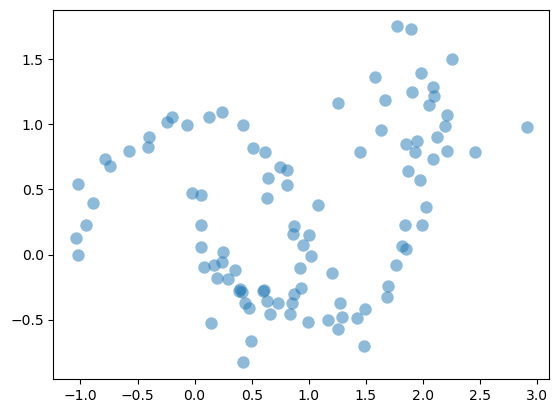

In [609]:
fig, ax = plt.subplots(1,1)
ax.scatter(test_data.T[0], test_data.T[1], color=cmap.colors[0], **plot_kwds)
plt.savefig('hdb_1_initial_set.png', dpi=300, bbox_inches='tight')
plt.show()

In [593]:
hdb = HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
# hdb = HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=True, leaf_size=40,
#     metric='euclidean', min_cluster_size=5, min_samples=None, p=None)
# hdb.fit(test_data)
# hdb = HDBSCAN(min_cluster_size=10)
# cluster_labels = hdb.fit_predict(X)
cluster_labels = hdb.fit_predict(test_data)
core_samples_mask = np.asarray([True if i != -1 else False for i in cluster_labels])
labels = hdb.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

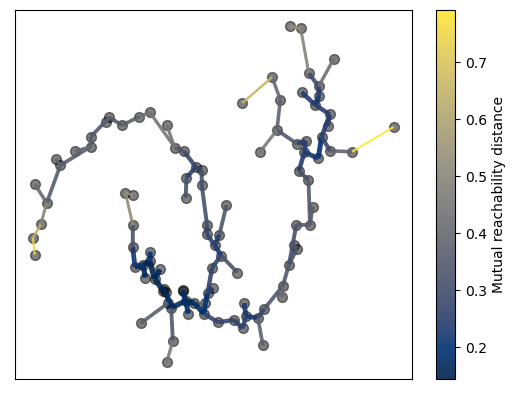

In [610]:
hdb.minimum_spanning_tree_.plot(
    edge_cmap='cividis',
    edge_alpha=0.9,
    node_size=50,
    node_alpha=0.5,
    edge_linewidth=1.5)
plt.savefig('hdb_2_min_tree.png', dpi=300, bbox_inches='tight')
plt.show()

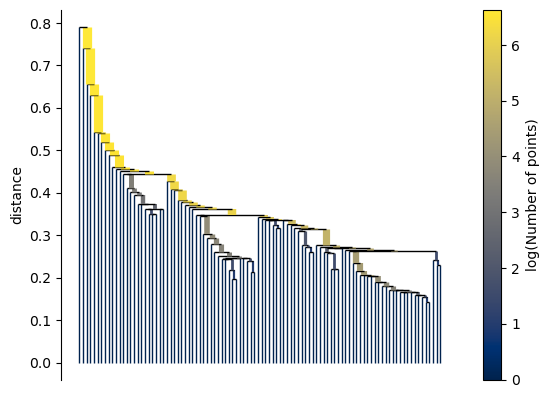

In [611]:
hdb.single_linkage_tree_.plot(cmap='cividis')
plt.savefig('hdb_3_singlelink.png', dpi=300, bbox_inches='tight')
plt.show()

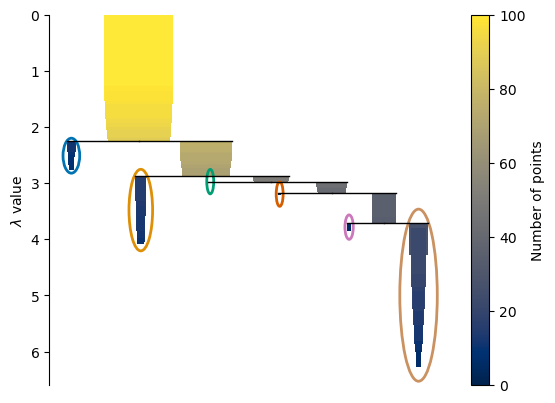

In [612]:
hdb.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette('colorblind', 8),
    cmap='cividis')
plt.savefig('hdb_4_condensed_tree.png', dpi=300, bbox_inches='tight')
plt.show()

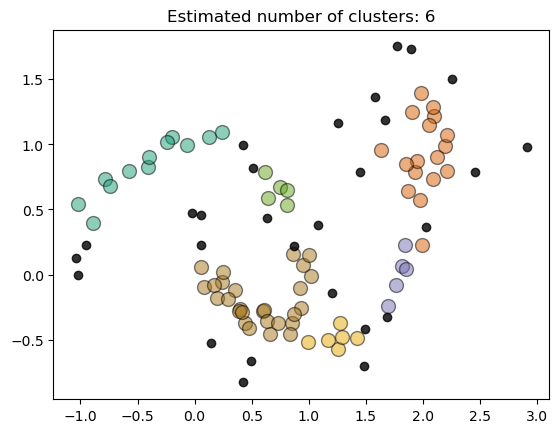

In [613]:
unique_labels = set(labels)
colors = [plt.cm.get_cmap('Dark2')(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = test_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
        alpha=0.5,
    )

    xy = test_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        alpha=0.8,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.savefig('hdb_5_final_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In [514]:
hdb.condensed_tree_.to_networkx()

In [590]:
g = hdb.condensed_tree_.to_networkx()
g.number_of_nodes()

111

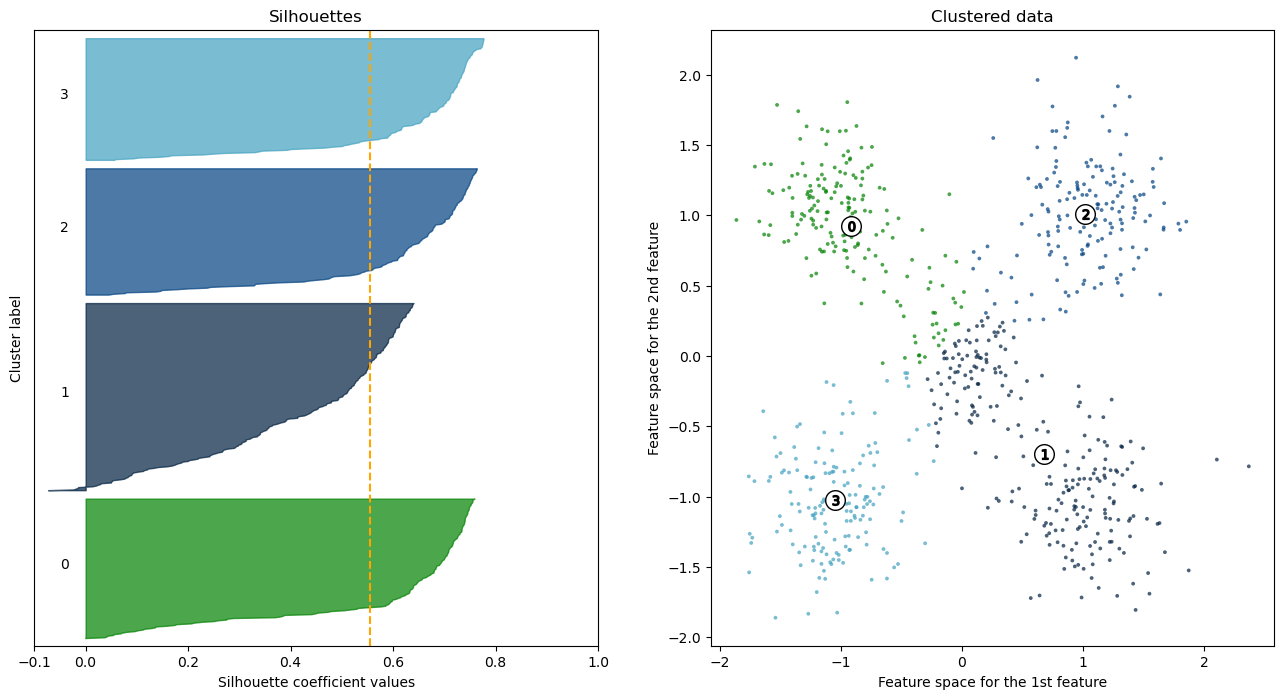

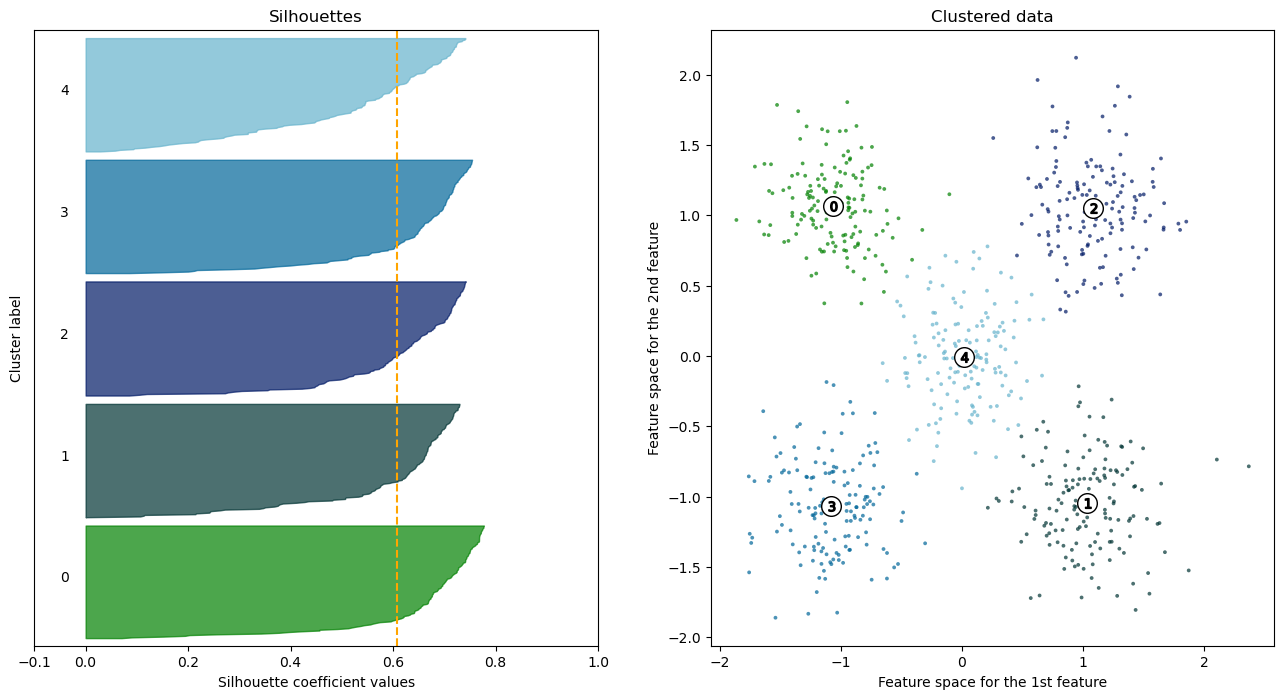

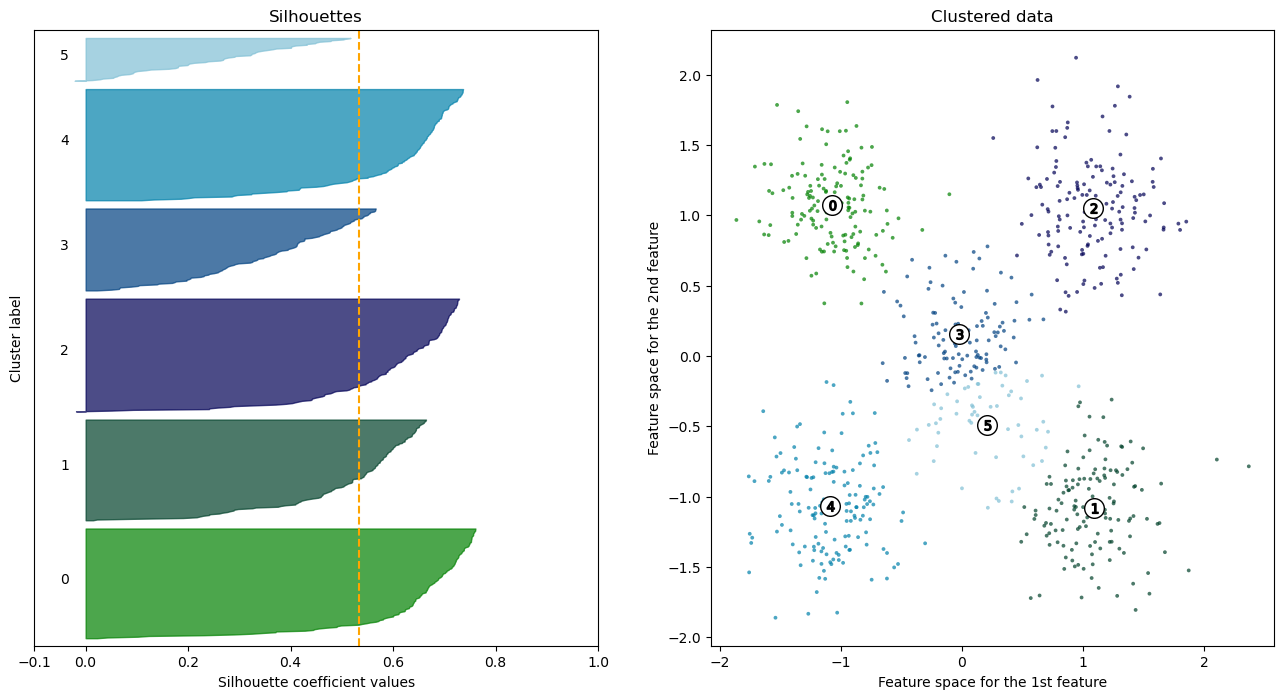

In [21]:
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

# range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    # print(
    #     r"For $k$ clusters =",
    #     n_clusters,
    #     "The mean silhouette_score is :",
    #     silhouette_avg,
    # )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    colors = [plt.cm.get_cmap('viridis_r')(each) for each in np.linspace(0, 1, n_clusters)]
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.ocean(float(i) / n_clusters)
        # colors = [plt.cm.get_cmap('viridis_r')(each) for each in np.linspace(0, 1, n_clusters)]
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            # facecolor=colors[i],
            # edgecolor=colors[i],
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouettes")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="orange", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.ocean(cluster_labels.astype(float) / n_clusters)
    # colors = [plt.cm.get_cmap('viridis_r')(each) for each in np.linspace(0, 1, n_clusters)]
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.savefig(f'sil_plots_{n_clusters}.png',dpi=300)
    

#     plt.suptitle(
        
#         # fr"$k$ clusters = {%d}"
#         # % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )
plt.show()

In [8]:
colors.shape

(750, 4)